In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
sets_df = pd.read_csv("C:/Users/Public/Documents/JamieJ042.github.io/assets/datasets/LegoProject/sets.csv")
themes_df = pd.read_csv("C:/Users/Public/Documents/JamieJ042.github.io/assets/datasets/LegoProject/themes.csv")

In [5]:
sets_df.head()


,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [6]:
themes_df.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [7]:
sets_df = sets_df.rename(columns={'name': 'Sets_name'})
themes_df = themes_df.rename(columns={'name': 'Themes_name'})

In [8]:
merged_df = pd.merge(sets_df, themes_df, left_on='theme_id', right_on='id')
merged_df

,set_num,Sets_name,year,theme_id,num_parts,id,Themes_name,parent_id
0,00-1,Weetabix Castle,1970,414,471,414,Castle,411.0
1,0011-2,Town Mini-Figures,1978,84,12,84,Supplemental,67.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,143,Supplemental,126.0
...,...,...,...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15,408,LEGO Brand Store,NaN
11669,WHITEHOUSE-1,Micro White House,2015,598,59,598,Promotional,NaN
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146,408,LEGO Brand Store,NaN
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28,494,Friends,NaN


In [9]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   set_num      11673 non-null  object 
 1   Sets_name    11673 non-null  object 
 2   year         11673 non-null  int64  
 3   theme_id     11673 non-null  int64  
 4   num_parts    11673 non-null  int64  
 5   id           11673 non-null  int64  
 6   Themes_name  11673 non-null  object 
 7   parent_id    8046 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 729.7+ KB


In [10]:
main_df = merged_df.drop_duplicates()
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11673 entries, 0 to 11672
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   set_num      11673 non-null  object 
 1   Sets_name    11673 non-null  object 
 2   year         11673 non-null  int64  
 3   theme_id     11673 non-null  int64  
 4   num_parts    11673 non-null  int64  
 5   id           11673 non-null  int64  
 6   Themes_name  11673 non-null  object 
 7   parent_id    8046 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 729.7+ KB


In [11]:
main_df = main_df.fillna('Unknown')


In [12]:
main_df.isnull().sum()

set_num        0
Sets_name      0
year           0
theme_id       0
num_parts      0
id             0
Themes_name    0
parent_id      0
dtype: int64

# Sets Analysis 

In [13]:
main_df['year'].sort_values().head()

6938    1950
6935    1950
6959    1950
6954    1950
6957    1950
Name: year, dtype: int64

In [14]:
main_df[main_df['year']==1950]

,set_num,Sets_name,year,theme_id,num_parts,id,Themes_name,parent_id
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10,371,Supplemental,365.0
6938,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9,371,Supplemental,365.0
6954,700.A-1,Automatic Binding Bricks Small Brick Set (Lego...,1950,366,24,366,Basic Set,365.0
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7,371,Supplemental,365.0
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7,371,Supplemental,365.0
6958,700.B.3-1,Individual 1 x 2 x 2 Window (without glass),1950,371,7,371,Supplemental,365.0
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7,371,Supplemental,365.0


In [15]:
main_df.sort_values('num_parts',ascending=False).head()

,set_num,Sets_name,year,theme_id,num_parts,id,Themes_name,parent_id
170,10189-1,Taj Mahal,2008,276,5922,276,Sculptures,Unknown
11614,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,169,5461,169,Star Wars Episode 4/5/6,158.0
1337,2000409-1,Window Exploration Bag,2010,507,5200,507,Educational and Dacta,Unknown
161,10179-1,Millennium Falcon - UCS,2007,174,5195,174,Star Wars Episode 4/5/6,171.0
8322,75827-1,Firehouse Headquarters,2016,301,4640,301,Other,Unknown


In [16]:
sets_by_year = main_df.groupby('year').count()
sets_by_year.head()

,set_num,Sets_name,theme_id,num_parts,id,Themes_name,parent_id
year,,,,,,,
1950,7,7,7,7,7,7,7
1953,4,4,4,4,4,4,4
1954,14,14,14,14,14,14,14
1955,28,28,28,28,28,28,28
1956,12,12,12,12,12,12,12


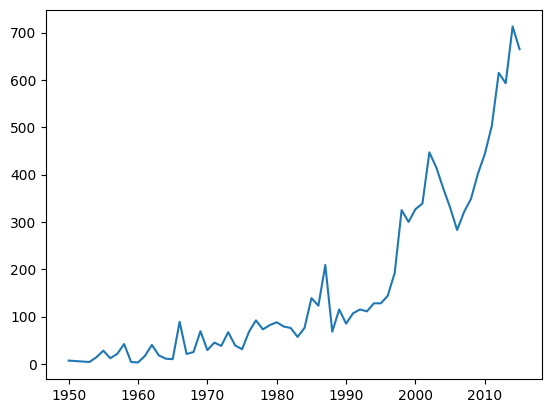

In [17]:
plt.plot(sets_by_year.index[:-2],sets_by_year['set_num'][:-2])
plt.show()

In [18]:
themes_by_year = main_df.groupby('year').agg({'theme_id' : pd.Series.nunique })

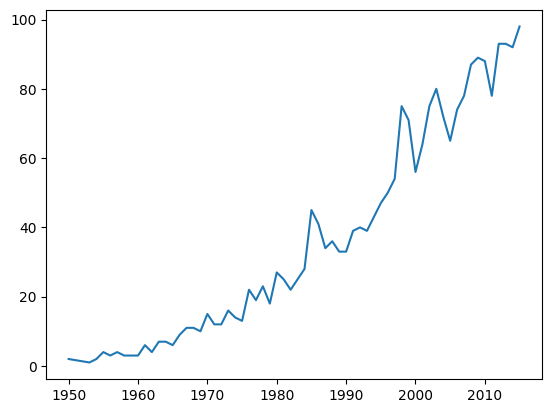

In [19]:
plt.plot(themes_by_year.index[:-2],themes_by_year['theme_id'][:-2])
plt.show()

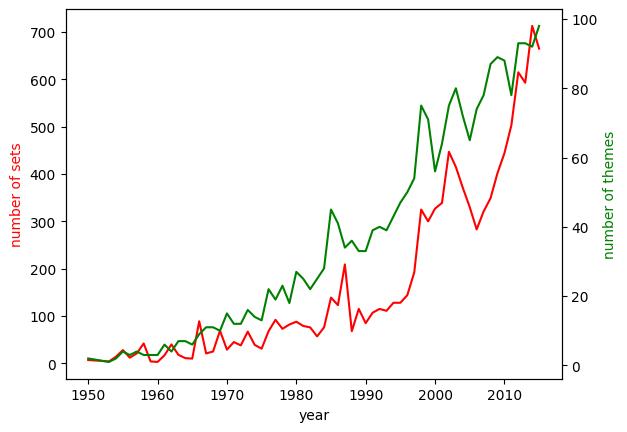

In [20]:
ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.plot(sets_by_year.index[:-2],sets_by_year.set_num[:-2],color='r')
ax2.plot(themes_by_year.index[:-2],themes_by_year.theme_id[:-2],color='g')


ax1.set_xlabel('year')
ax1.set_ylabel('number of sets',color='r')
ax2.set_ylabel('number of themes',color='g')

plt.show()

In [22]:
parts_per_set = main_df.groupby('year').agg({'num_parts':pd.Series.mean})

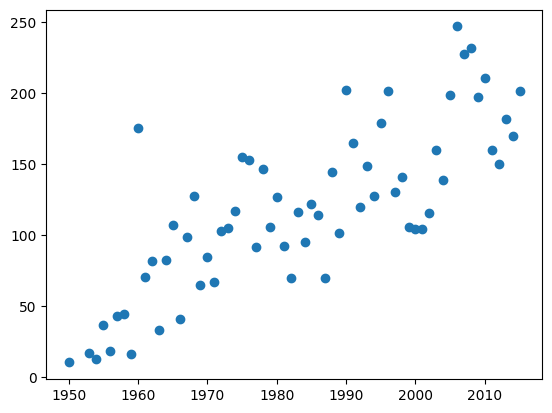

In [23]:
plt.scatter(parts_per_set.index[:-2],parts_per_set.num_parts[:-2])
plt.show()